**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved



# **Part 1:  Cleaning and Preprocessing Automobile Data**
In this project, we will investigate automobile features from a dataset and preprocess the data.

As we clean and explore this data, you will gain practice with:

*  Reading simple csv files and using Pandas, Numpy, and Matplotlib
*  Working with data at different levels of granularity
*  Identifying the type of data collected, missing values, anomalies, etc.
*  Exploring characteristics and distributions of individual variablesa

The following list provides several example dataset links.  (these will be useful for future project assignments).
- UCI: https://archive.ics.uci.edu/
- Wikipedia:  https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research/
- Kaggle:  https://www.kaggle.com/datasets/
- National Geospatial Program:  https://www.usgs.gov/core-science-systems/national-geospatial-program/data-tools/
- Seattle Central College Quant Environmental learning Project:  https://seattlecentral.edu/qelp/Data.html
- Carnegie Mellon:  http://lib.stat.cmu.edu/datasets/
- NIST:  https://www.itl.nist.gov/div898/strd/
- MNIST:  https://chromium.googlesource.com/external/github.com/tensorflow/tensorflow/+/r0.7/tensorflow/g3doc/tutorials/mnist/download/index.md


The following instructions are identified as Steps in the text cells preceding their corresponding code cell. Read through the instructions and write/fill-in the appropriate code in the cells.   

Make sure your code passes all the embedded doctests.

**Step 1:**  
Mount your Google drive and copy the provided files to your working directory.  Alternatively, you can read the file directly from the link provided in the cell below.
- imports-85.csv
- imports-85.names


In [48]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math 

In [49]:
#Mount your google drive
#YOUR CODE HERE
data = pd.read_csv('imports-85.csv', names=["symboling", "normalized-losses", "make", "fuel-type", "aspiration",
         "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
        "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
        "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
        "peak-rpm", "city-mpg", "highway-mpg", "price"])
print(data.head(5))



   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

**Step 2:**  
Import all relevant python libraries:
- numpy
- pandas
- matplotlib (pyplot)

**Step 3:**  
Read the auto data into a Pandas dataframe.  
NAME YOUR DATAFRAME VARIABLE '**data**' to be compatible with the embedded doctests.  Read the provided csv file directly.

Note, you should set up a list of column headers according to the imports-85.names file.   
Examine the first 5 rows of the dataset, and check out the dataset statistics.

Hints:
- https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html







In [50]:
#Read the dataset from the provided csv file
#Create a list of the headers according to the imports-85.names file.
#YOUR CODE HERE

data.replace('?', np.nan, inplace=True)

print(data.head(1))


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   

  highway-mpg  price  
0          27  13495  

[1 rows x 26 columns]


**Step 4:**  
Replace all the ?'s in the dataset with NaN.  
Perform the operation 'in-place', meaning it replaces within the same object (not in another data structure).  
Examine the first 5 rows to confirm your replacement.   
Make sure your code passes the doctest.

Hint:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html



In [51]:
#Replace all ? with NaN
#Do it "inplace"- replaces in the same object
#YOUR CODE HERE


#Do not modify the test code below this line
import doctest
"""
  >>> print(data['normalized-losses'].iat[1])
  nan
  >>> print(data['peak-rpm'].iat[131])
  nan
  >>> print(data['horsepower'].iat[130])
  nan
"""

doctest.testmod()

TestResults(failed=0, attempted=3)

**Step 5:**  
Find and count the missing data (i.e. the entries that were changed to NaN in the previous step).  
Suggested method:
*   First mark the missing data with "True"
*   Count the "True" tags in a loop

Make sure your code passes the doctest.

Hints:
- https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html


In [52]:
#Detect and count the missing data
#YOUR CODE HERE

missing_data = data.isnull()
for i in data.columns:
    count = missing_data[i].sum()
    if count > 0:
        print(f"column {i}: {count}")
#Do not modify the test code below this line
import doctest
"""
  >>> print(missing_data['normalized-losses'].value_counts())
  normalized-losses
  False    164
  True      41
  Name: count, dtype: int64
  >>> print(missing_data['symboling'].value_counts())
  symboling
  False    205
  Name: count, dtype: int64
  >>> print(missing_data['bore'].value_counts())
  bore
  False    201
  True       4
  Name: count, dtype: int64
  >>> print(missing_data['horsepower'].value_counts())
  horsepower
  False    203
  True       2
  Name: count, dtype: int64
"""

doctest.testmod()

column normalized-losses: 41
column num-of-doors: 2
column bore: 4
column stroke: 4
column horsepower: 2
column peak-rpm: 2
column price: 4


TestResults(failed=0, attempted=4)

**Step 6:**  
Now in order to perform an modeling on our dataset, we'll need to account for the missing data.  Some options include removing the row altogether, but this may also delete other meaningful data, so more common approaches include replacing missing data with a statistic, such as with the mean of the feature column or replacing it with the most common option of the feature.  
Perform the following operations:
1.   Replace missing data in the 'normalized-losses' feature with its mean.
2.   Replace missing data 'num-of-doors' and 'bore' features with the most common option in their respective feature column.
3.   Drop the example ROW if the 'price' feature is missing for that example.  Note, axis=0 drops whole row, axis=1 drops whole column

Make sure your code passes the doctest.


Hints:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html



In [53]:
#Replace missing data in the 'normalized-losses' feature with its mean.
#YOUR CODE HERE
data['bore'] = pd.to_numeric(data['bore'], errors = 'coerce')
most_common_bore = data['bore'].value_counts().idxmax()
print(most_common_bore)
data['bore'] = data['bore'].fillna(most_common_bore)

data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], errors = 'coerce')
mean_normalized_losses = data['normalized-losses'].mean()
data['normalized-losses'] = data['normalized-losses'].fillna(mean_normalized_losses)


#Do not modify the test code below this line
import doctest
"""
  >>> print(data['normalized-losses'].iat[1])
  122.0
  >>> print(data['normalized-losses'].iat[15])
  122.0
"""

doctest.testmod()

3.62


TestResults(failed=0, attempted=2)

In [54]:
#Replace missing data 'num-of-doors' and 'bore' features with the most common option in their respective feature column.
#YOUR CODDE HERE
most_common_doors = data['num-of-doors'].value_counts().idxmax()
data['num-of-doors'] = data['num-of-doors'].fillna(most_common_doors)


print(data['num-of-doors'].unique())
#Do not modify the test code below this line
import doctest
"""
  >>> print(data['num-of-doors'].iat[27])
  four
  >>> print(data['bore'].iat[57])
  3.62
"""

doctest.testmod()

['two' 'four']


TestResults(failed=0, attempted=2)

In [55]:
#Drop the example ROW if the 'price' feature is missing for that example.
#YOUR CODE HERE


data = data.dropna(subset=['price'], axis = 0)
print(f'missing data: {data.isnull().sum()}')
print(data.columns)
#Do not modify the test code below this line
import doctest
"""
  >>> print(len(data['price']))
  201
"""

doctest.testmod()

missing data: symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64
Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
      

TestResults(failed=0, attempted=1)

**Step 7:**  
We typically want any categorical data with string data types to be formatted as objects when preparing data for our machine learning model.  Also, any numeric values should be int or float types.  Finally, columns that have IDs typed as objects but are actually numeric values should be converted to their numeric types.  Perform the following on your dataset.
*  Print out the data types
*  Change data types for numeric columns that are identified as objects

Compare the updated data types to the original print out to make sure they were updated.   
Make sure your code passes the doctest.

Hints:
- bore, stroke, normalized-losses, peak-rpm all need to change.  Note, you will need to replace the NaNs as needed first (replace with mean of column).
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html




In [56]:
#Change data types for numeric columns that are identified as objects
#YOUR CODE HERE
df = pd.DataFrame(data)

cols_to_solve = ['stroke', 'price', 'peak-rpm', 'normalized-losses']

for col in cols_to_solve:
  data[col] = pd.to_numeric(data[col], errors='coerce')

# Ensuring that column replace with Nan values with values from the column with specific float or int
data['stroke'] = data['stroke'].fillna(data['stroke'].mean()).astype(float)
data['price'] = data['price'].fillna(data['price'].mean()).astype(float)
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean()).astype(int)
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean()).astype(int)


#Do not modify the test code below this line
import doctest
"""
  >>> print(data[['bore', 'stroke', 'normalized-losses', 'price', 'peak-rpm']].dtypes)
  bore                 float64
  stroke               float64
  normalized-losses      int64
  price                float64
  peak-rpm               int64
  dtype: object
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

**Step 8:**  
Many machine learning algorithms are sensitive to features with different ranges, for example, linear regression.  So, normalization is a common practice to implement on the data.

*   Normalize the 'length', 'height' and 'width' columnsa

Make sure your code passes the doctest.


Hint:  there isn't a built-in Pandas function so a simply conversion is to divide each element by the feature maximum.
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html

In [57]:
#Normalize the length, height, and width columns
#Divide each element of column by its max value
#YOUR CODE HERE

data['length'] = data['length']/ data['length'].max()
data['height'] = data['height']/ data['height'].max()
data['width'] = data['width']/ data['width'].max()


#Do not modify the test code below this line
import doctest
"""
  >>> print(np.round(data['length'].iat[0],4))
  0.8111
  >>> print(np.round(data['height'].iat[27],4))
  1.0
  >>> print(np.round(data['width'].iat[57],4))
  0.9236
  >>> print(np.round(data['length'].iat[3],4))
  0.8486
  >>> print(np.round(data['height'].iat[85],4))
  0.8629
  >>> print(np.round(data['width'].iat[163],4))
  0.9111
"""

doctest.testmod()

TestResults(failed=0, attempted=6)

**Step 9:**  
Data visualization - data binning

*   Generate a histogram plot of the horsepower data into high, med, low bins
*   Take a screenshot of your plot and paste it into a document to submit with this assignment.  Your plot should look similar to this:

![alt text](https://drive.google.com/uc?id=1IHeKByfKhJOW8DG3xVMAouFgdoKhvH6t)  


Hints:
- First replace any NaNs with the mean of the column, and convert objects to integers
- Group the feature into 4 different ranges:  less than 'low', between 'low' and 'med', between 'med' and 'high', and greater than 'high.
- Count the values in each of the ranges
- Plot the bins on a histogram
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
- https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
- https://pandas.pydata.org/docs/reference/api/pandas.cut.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


In [67]:
#Create bin array with min, max and range using numpy linspace
#and setup 3 bins (high, med, low) - 4 dividers in the histogram
#First remove NaNs and convert objects to integers
#Group the feature into 4 different ranges: <= 'low', >'low' && <='med', >'med'&& <='high', >'high.
#Count the values in each of the ranges
#Plot the bins on a histogram
#YOUR CODE HERE
data['horsepower'] = data['horsepower'].replace('?', np.nan)
data = data[pd.to_numeric(data['horsepower'], errors='coerce').notnull()]
data['horsepower'] = data['horsepower'].astype(float)
data['horsepower'].fillna(data['horsepower'].mean())

print(data['horsepower'].isnull().sum())
print(data['horsepower'].head())

bins = np.linspace(data['horsepower'].min(), data['horsepower'].max(), 4)

ranges = ['low', 'med', 'high']

data['horsepower'] = pd.cut(data['horsepower'],bins , labels=ranges, include_lowest=True)

data['horsepower'].value_counts().sort_index().plot(kind='bar')

plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Binned Horsepower Distribution")
plt.show()



0
Series([], Name: horsepower, dtype: float64)


ValueError: bins must increase monotonically.

**Step 10:**  
Write the preprocessed dataset to a csv file

Hint:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
- Use '!cp' to copy the file to a folder on your Google drive




In [59]:
#Write preprocessed dataset to csv file
#YOUR CODE HERE


data.to_csv("new_data.csv", index=False)

# **Part 2:  Modeling your Pre-processed Automobile Data**
Now that you have cleaned your dataset you are ready to apply a machine learning model.

<br>

**Simple Linear Regression - Manual Calculation**  

In this part, you will perform a manual calculation of the coefficients used in a simple linear regression model for a given dataset.  For now, just follow the steps outlined in the following procedure - we will discuss Regression in depth in the Machine Learning Algorithms course.

We will attempt to fit a simple linear regression model using 2 features from the cleaned dataset.  The model "score" will help us determine how well one variable can predict another.

Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Create a function which MANUALLY (using the equations below) calculates the coefficients for a simple linear regression model.
  - Inputs:  X = dataset independent variable, y = dataset dependent variable
  - Return: coefficients b0, and b1

  (NOTE, you may NOT use any machine learning library models for this step - you must calculate the parameters use the equations shown).  

$$\hat y = b_0+b_1x_1$$  
$$b_1=\frac {\sum
(x_n-\bar x)(y_n-\bar y)} {\sum
(x_n-\bar x)^2}
$$  
$$b_0=\bar y-b_1\bar x$$  

-  **Step 2**: Create a function which generates a predicted output y_hat using the prediction equation from the previous step.
  - Inputs:  X = dataset independent variable, coefs = regression model coefficients (b0, b1)
  - Return: predicted output y_hat
-  **Step 3**: Create a function which plots the dataset (X, y) and the calculated regression line (equation of the prediction line y_hat)
  - Inputs:  X = dataset independent variable, y = dataset dependent variable, y_hat = predicted output
  - Return: none
-  **Step 4**:  Create a function which calculates the performance using R-squared using sklearn r2_score function (you may use the sklearn library for this step). Read the documentation on this function to get a feel for the range and interpretation of this score.  We will discuss R-squared scores in detail when covering Regression, but for now, you may simply call the sklearn function. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
  - Inputs: y = actual dependent variables, y_hat = predicted output based on calculated regression line
  - Return: R_squared value
-  **Step 5**:  Confirm your calculated coefficients and R-squared performance metric using the embedded doctest module.  Record your regression equation.
The doctest will attempt to call your plot function and package it into a set of subplots, which should like the following:
<br>

![alt text](https://drive.google.com/uc?id=1lntqgvABAlQUCyH0gBXc0ukb4kOUkGJu)   

-  **Step 6**:  Reflect on the performance of your model.  What does the R-squared parameter tell you about the properties of this dataset and your simple linear prediction?  Which of the independent variables best predicted the normalized-losses variable?  Given the R-squared scores you saw, is this a good model?


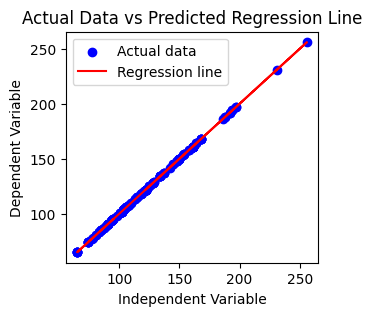

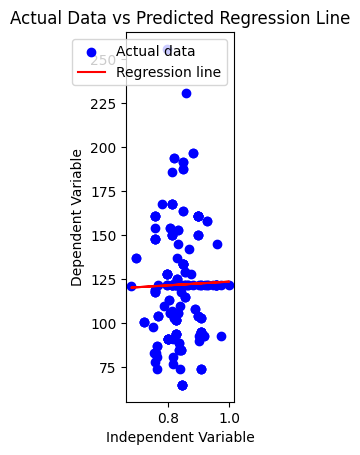

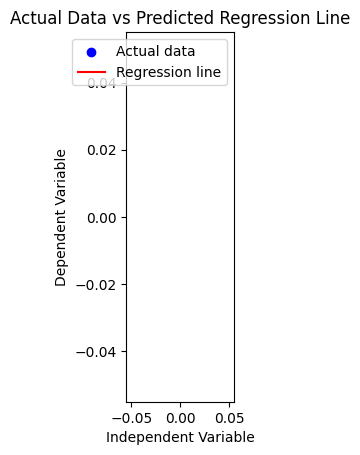

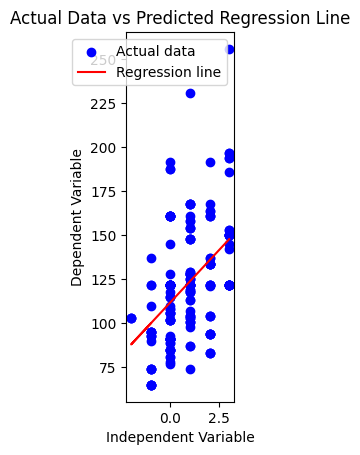

**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(np.round(simple_LR_coefs(X_test[1], y), 5))
Expected:
    [113.214    10.49573]
Got:
    [113.19897  10.51669]
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(np.round(simple_LR_coefs(X_test[2], y), 5))
Expected:
    [102.76122   0.18607]
Got:
    [nan nan]
**********************************************************************
File "__main__", line 13, in __main__
Failed example:
    print(np.round(score(y, prediction(X_test[2], (simple_LR_coefs(X_test[2], y)))), 5))
Exception raised:
    Traceback (most recent call last):
      File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/doctest.py", line 1395, in __run
        exec(compile(example.source, filename, "single",
        ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                     comp

TestResults(failed=5, attempted=8)

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


#Step 1:  Create a function which MANUALLY (using the equations) calculates the
#         coefficients for a simple linear regression model.
#         Your function must input numpy arrays for the X and y variables and return b0 and b1.
#         Your function MUST use equations shown in the text cell above.
#         (i.e. - you may not use a Machine Learning library API for this step,
#                 calculate the parameters use the equations above).
#         Inputs:  X = dataset independent variable, y = dataset dependent variable
#         Return: coefficients b0, and b1
numeric_cols = ['normalized-losses', 'length', 'horsepower', 'symboling']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


data.fillna(data[numeric_cols].mean(), inplace=True)

X_test = [
    data['normalized-losses'].values,
    data['length'].values,
    data['horsepower'].values,
    data['symboling'].values
]

y = data['normalized-losses'].values  # Ensure y is a numpy array

def simple_LR_coefs(X, y):
  #YOUR CODE HERE
  mean_x = np.mean(X)
  mean_y = np.mean(y)
  
  numerator = np.sum((X - mean_x) * (y - mean_y))
  denominator = np.sum((X - mean_x) ** 2)
  
  b1 = numerator / denominator
  
  b0 = mean_y - b1 * mean_x
    
  return b0, b1


#Step 2:  Create a function which generates a predicted output y_hat
#               using the prediction equation in the text cell above.
#               Your function MUST use equations shown in the text cell above.
#               (i.e. - you may not use a Machine Learning library API)
#               Inputs:  X = dataset independent variable,
#                        coefs = regression model coefficients (b0, b1)
#               Return: predicted output y_hat
def prediction(X, coefs):
  #YOUR CODE HERE
  b0, b1 = coefs
  y_hat = X * b1 + b0
  return y_hat


#Step 3:  Create a function plots the dataset and the calculated regression line
#         Inputs:  X = dataset independent variable, y = dataset dependent variable,
#                  y_hat = predicted output
#         Return: none
def plot(X, y, y_hat):
  #YOUR CODE HERE
  plt.scatter(X, y, color='blue', label='Actual data')
  plt.plot(X, y_hat, color='red', label='Regression line')
  plt.xlabel('Independent Variable')
  plt.ylabel('Dependent Variable')
  plt.title('Actual Data vs Predicted Regression Line')
  plt.legend()
  plt.show()

#Step 4:  Create a function which calculates the performance using R-squared using sklearn r2_score function.
#         Inputs: y = actual dependent variables, y_hat = predicted output based on calculated regression line
#         Return: R_squared value
#         Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def score(y, y_hat):
  #YOUR CODE HERE
  return r2_score(y, y_hat)




#Step 5:  Run the doctest module.  DO NOT modify any code below this line!

import doctest
# X_test = np.array([data['normalized-losses'],
#                    data['length'],
#                    data['horsepower'],
#                    data['symboling']])

# y = data['normalized-losses']

#Create subplots for test data
plt.figure(figsize=(15,3))
for i in range (len(X_test)):
  plt.subplot(1, 4, i+1)
  plot(X_test[i], y, prediction(X_test[i], (simple_LR_coefs(X_test[i], y))))
plt.show()

"""
  >>> print(np.round(simple_LR_coefs(X_test[0], y), 5))
  [0. 1.]
  >>> print(np.round(score(y, prediction(X_test[0], (simple_LR_coefs(X_test[0], y)))), 5))
  1.0
  >>> print(np.round(simple_LR_coefs(X_test[1], y), 5))
  [113.214    10.49573]
  >>> print(np.round(score(y, prediction(X_test[1], (simple_LR_coefs(X_test[1], y)))), 5))
  0.00038
  >>> print(np.round(simple_LR_coefs(X_test[2], y), 5))
  [102.76122   0.18607]
  >>> print(np.round(score(y, prediction(X_test[2], (simple_LR_coefs(X_test[2], y)))), 5))
  0.04722
  >>> print(np.round(simple_LR_coefs(X_test[3], y), 5))
  [112.00354  11.88928]
  >>> print(np.round(score(y, prediction(X_test[3], (simple_LR_coefs(X_test[3], y)))), 5))
  0.2174
"""

doctest.testmod()
